In [1]:
import os
import warnings

import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
tags = pd.read_excel("../data/tags/tags.xlsx")

In [3]:
tags_dict = {}
for i in range(len(tags)):
    tags_dict[f"{tags.loc[i, 'Tags']}"] = tags.loc[i, 'Definition']

In [4]:
df = pd.read_csv("../data/interim/economic_dataset.csv")

In [5]:
df

,DATE,A091RC1Q027SBEA,A939RX0Q048SBEA,BOGMBASE,CCSA,CORESTICKM159SFRBATL,CPIAUCSL,CPILFESL,DEXUSEU,DGS10,...,T10Y2Y,TOTRESNS,UNEMPLOY,UNRATE,VIXCLS,W825RC1,WPU061,WPU0911,WPU10170502,WPU101707
0,1947-01-31,5.352,15248.0,NaN,NaN,NaN,21.480,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.500,20.100,NaN,NaN
1,1947-02-28,5.352,15248.0,NaN,NaN,NaN,21.620,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.700,20.100,NaN,NaN
2,1947-03-31,5.352,15248.0,NaN,NaN,NaN,22.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.000,20.600,NaN,NaN
3,1947-04-30,5.360,15139.0,NaN,NaN,NaN,22.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.600,21.100,NaN,NaN
4,1947-05-31,5.360,15139.0,NaN,NaN,NaN,21.950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.300,21.200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2023-12-31,1025.796,67513.0,5827400.0,1802400.0,4.554396,308.742,313.209,1.090940,4.020000,...,-0.437000,3492.0,6268.0,3.7,12.718500,22.9,300.512,205.776,175.3,413.808
924,2024-01-31,1059.235,67672.0,5843700.0,1782750.0,4.603922,309.685,314.438,1.089890,4.058095,...,-0.264762,3507.0,6124.0,3.7,13.388636,22.6,290.946,209.264,175.3,433.171
925,2024-02-29,1059.235,67672.0,5896900.0,1797250.0,4.403102,311.054,315.565,1.079300,4.207500,...,-0.336500,3567.7,6458.0,3.9,13.980476,22.8,296.303,210.580,175.3,454.090
926,2024-03-31,1059.235,67672.0,5883000.0,1801400.0,4.509212,312.230,316.698,1.087019,4.208500,...,-0.379500,3543.1,6429.0,3.8,13.787500,22.8,298.280,215.883,175.3,396.888


In [6]:
selected_cols = [
    "DATE",
    "A091RC1Q027SBEA",
    "A939RX0Q048SBEA",
    "BOGMBASE",
    "CCSA",
    # "CORESTICKM159SFRBATL",
    # "CPIAUCSL",
    # "CPILFESL",
    # "DEXUSEU",
    # "DGS10",
    # "DJIA",  다우존스
    # "DPCCRV1Q225SBEA",
    "FEDFUNDS",
    "FPCPITOTLZGUSA",
    "FYFSGDA188S",
    # "GDP",
    "GDPC1",
    "GFDEGDQ188S",
    "IMPGS",
    "IQ",
    "IR",
    "LNS14000006",
    # "M1SL",
    "M2REAL",
    # "M2SL",
    "M2V",
    "MEHOINUSA672N",
    # "MORTGAGE30US",
    # "NASDAQCOM",  나스닥
    "PAYEMS",
    # "PCE",
    "PCEC96",
    # "PCEPI",
    # "PCU325211325211",
    # "PCU325325",
    # "PCU32733273",
    # "PCUOMFGOMFG",
    "PPIACO",
    # "PPIFIS",
    "T10Y2Y",
    "TOTRESNS",
    # "UNEMPLOY",
    "UNRATE",
    "VIXCLS",
    # "W825RC1",
    # "WPU061",
    # "WPU0911",
    # "WPU10170502",
    # "WPU101707",
    "SP500_full",
]

In [7]:
df = df[selected_cols]

In [8]:
df["DATE"] = pd.to_datetime(df["DATE"])

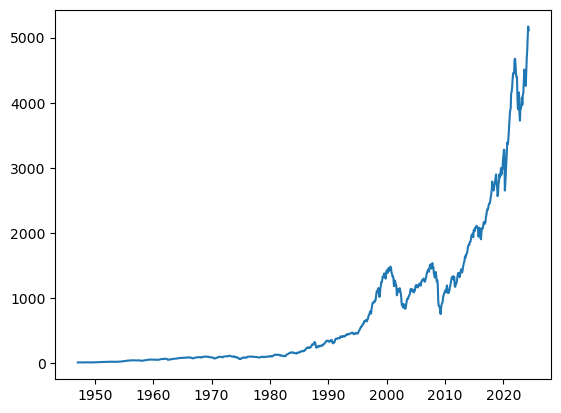

In [9]:
plt.figure()
plt.plot(df["DATE"], df["SP500_full"])
plt.show();

In [10]:
df = df.query("DATE > '1980-01-01'").reset_index(drop=True)

In [11]:
df

,DATE,A091RC1Q027SBEA,A939RX0Q048SBEA,BOGMBASE,CCSA,FEDFUNDS,FPCPITOTLZGUSA,FYFSGDA188S,GDPC1,GFDEGDQ188S,...,M2V,MEHOINUSA672N,PAYEMS,PCEC96,PPIACO,T10Y2Y,TOTRESNS,UNRATE,VIXCLS,SP500_full
0,1980-01-31,102.252,32377.0,156000.0,2781750.0,13.82,13.549202,-2.5839,7341.557,30.94982,...,1.869,NaN,90800.0,NaN,85.200,NaN,45.2,6.3,NaN,110.90
1,1980-02-29,102.252,32377.0,153900.0,2868500.0,14.13,13.549202,-2.5839,7341.557,30.94982,...,1.869,NaN,90883.0,NaN,86.900,NaN,43.2,6.3,NaN,115.30
2,1980-03-31,102.252,32377.0,155000.0,2881200.0,17.19,13.549202,-2.5839,7341.557,30.94982,...,1.869,NaN,90994.0,NaN,87.500,NaN,43.1,6.3,NaN,104.70
3,1980-04-30,107.264,31621.0,157900.0,3126500.0,17.61,13.549202,-2.5839,7190.289,31.37303,...,1.847,NaN,90849.0,NaN,87.800,NaN,44.9,6.9,NaN,103.00
4,1980-05-31,107.264,31621.0,157900.0,3544800.0,10.98,13.549202,-2.5839,7190.289,31.37303,...,1.847,NaN,90420.0,NaN,88.300,NaN,44.0,7.5,NaN,107.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2023-12-31,1025.796,67513.0,5827400.0,1802400.0,5.33,4.116338,-6.1903,22679.255,121.62069,...,1.350,74580.0,157304.0,15655.8,249.866,-0.437000,3492.0,3.7,12.718500,4685.05
528,2024-01-31,1059.235,67672.0,5843700.0,1782750.0,5.33,4.116338,-6.1903,22758.752,122.34717,...,1.361,74580.0,157560.0,15601.2,251.306,-0.264762,3507.0,3.7,13.388636,4804.49
529,2024-02-29,1059.235,67672.0,5896900.0,1797250.0,5.33,4.116338,-6.1903,22758.752,122.34717,...,1.361,74580.0,157796.0,15638.3,254.926,-0.336500,3567.7,3.9,13.980476,5011.96
530,2024-03-31,1059.235,67672.0,5883000.0,1801400.0,5.33,4.116338,-6.1903,22758.752,122.34717,...,1.361,74580.0,158106.0,15689.6,255.095,-0.379500,3543.1,3.8,13.787500,5170.57


In [12]:
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)

In [13]:
df.to_csv("../data/processed/economic_dataset.csv", index=False)